# Вспоминаем что такое машинное обучение. 

## Основные понятия
+ Обучение с учителем/ без учителя
+ Объект
+ Целевая переменная
+ Признаки (количественные/бинарные/категориальные)
+ Ответы 
+ Модель 

## Первичный анализ данных, pandas

**pandas** - библиотека для работы с данными в табличном формате   

+ будем работать с датасетом [Student Performance](http://archive.ics.uci.edu/ml/datasets/Student+Performance#)
+ постараемся предсказать итоговую оценку по математике (G3) по разным другим признакам 



### Attributes


1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid**- extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)



### Target:
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32.**G3** - final grade (numeric: from 0 to 20, output target)

### Посмотрим на данные

In [0]:
import pandas as pd

In [0]:
# загружаем датасет с оценками по математике
# не забываем указать правильный разделитель
data = pd.read_csv('https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv', delimiter=';')

In [3]:
# посмотрим на первые 15 строк таблицы
# каждая строка - объект
# столбцы - признаки
data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


### Удаление столбцов, добавление столбцов, сортировка

In [0]:
# убираем столбцы G1 и G2, т.к. нас интересует только G3
data = data.drop(columns=['G1', 'G2'])

In [0]:
# добавить столбец
data['MeanAlc'] = (data['Walc']+data['Dalc'])/2

In [0]:
data = data.drop(columns=['MeanAlc'])

In [0]:
# отсортируем по оценкам по убыванию
sorted_data = data.sort_values(by='G3', ascending=False)

In [8]:
# первые 5 учеников
sorted_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,20
113,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,1,1,4,6,19
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,other,mother,1,3,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,2,5,19
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,19


In [9]:
# последние 5 учеников
sorted_data.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
160,GP,M,17,R,LE3,T,2,1,at_home,other,course,mother,2,1,2,no,no,no,yes,yes,no,yes,yes,3,3,2,2,2,5,0,0
162,GP,M,16,U,LE3,T,1,2,other,other,course,mother,2,1,1,no,no,no,yes,yes,yes,no,no,4,4,4,2,4,5,0,0
168,GP,F,16,U,GT3,T,2,2,other,other,home,mother,1,2,0,no,yes,yes,no,no,yes,yes,no,5,1,5,1,1,4,0,0
367,MS,F,17,R,GT3,T,1,1,other,services,reputation,mother,3,1,1,no,yes,yes,no,yes,yes,yes,yes,5,2,1,1,2,1,0,0
150,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,3,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,0


### Индексация

In [10]:
# индексация - строки
data.loc[0]
# data.loc[:10]

school             GP
sex                 F
age                18
address             U
famsize           GT3
Pstatus             A
Medu                4
Fedu                4
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
traveltime          2
studytime           2
failures            0
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
famrel              4
freetime            3
goout               4
Dalc                1
Walc                1
health              3
absences            6
G3                  6
Name: 0, dtype: object

In [39]:
# индексация - столбцы
data['G3']
# data[['school', 'address']] # несколько столбцов

,school,address
0,GP,U
1,GP,U
2,GP,U
3,GP,U
4,GP,U
...,...,...
390,MS,U
391,MS,U
392,MS,R
393,MS,R


In [12]:
# и то, и другое
data['G3'].loc[0]
# data.loc[0]['G3'] # так тоже можно

6

In [13]:
# индексация по условию
# средняя оценка людей, состоящих в отношениях
data[data['romantic'] == 'yes']['G3'].mean()

9.575757575757576

In [14]:
# и не состоящих
data[data['romantic'] == 'no']['G3'].mean()

10.836501901140684

###Задание
Найти средний возраст тех, кто много пьет (Dalc и Walc = 4) и тех, кто мало пьёт (Dalc и Walc = 1)


## Типы признаков и их статистические характеристики

In [15]:
# названия столбцов
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [16]:
# количестов объектов, названия и типы признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [17]:
# узнать разные статистические характеристики признаков 
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [18]:
# то же самое для бинарных и категориальных признаков
# в include пишем нужные типы переменных
data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts.

In [19]:
# узнаем какие профессии родителей встречаются чаще всего
data['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [20]:
# то же самое, но в % соотношении
data['Mjob'].value_counts(normalize=True)

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64

In [21]:
data['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

### Сводные таблицы

In [22]:
# pd.crosstab(data['sex'], data['romantic'])
pd.crosstab(data['sex'], data['romantic'], normalize=True)

romantic,no,yes
sex,,
F,0.326582,0.200000
M,0.339241,0.134177


In [23]:
# сколько мальчиков и девочек среду тех, кто получил худшие оценки
worst_grades = data[data['G3'] <= 5]
pd.crosstab(worst_grades['G3'], worst_grades['sex'], normalize=True)

sex,F,M
G3,,
0,0.500000,0.326087
4,0.021739,0.000000
5,0.065217,0.086957


### Бонус - google facets

In [24]:
!pip install facets-overview
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from IPython.core.display import display, HTML

In [0]:
# создать таблицу со статистиками признаков
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'data', 'table': data}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8") # превратить данные в строку

In [26]:
 # отобразить интерактивную таблицу со статистиками признаков
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [27]:
# отобразить интерактивное представление данных
jsonstr = data.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

### **Вопросы**
+ Какие признаки на самом деле не категориальные?
+ Какой % учеников ни разу не пропускал занятия?
+ Какой % учеников проваливал экзамены хотя бы один раз?
+ Есть ли сильно пьющие ученики (Dalc или Walc 3 и больше) с высокими оценками (G3 >= 18)?
+ Есть ли состоящие в отношениях ученики с высокими оценками (G3 >= 18)? Какая самая высокая оценка среди сильно пьющих учеников?
+ Правда ли, что большинство людей с высшим баллом (G3 >= 18) пьют мало/не пьют (Dalc и Walc = 1)?

## Корреляции

In [28]:
# корреляция между признаками (только количественные)
data.corr()
# data.corr().abs() # абсолютные значения

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.054660


In [29]:
# признаки, больше всего коррелирующие с целевой переменной (G3)
data.corr().abs()['G3'].sort_values(ascending=False)

G3            1.000000
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

### Вопросы
+ Те, кто много пьёт, учатся хуже?
+ Учащиеся, которые живут дальше от школы чаще отстутствуют? 

### Задание
Написать функцию, которая выведет топ n пар признаков с самым высоким абсолютным коэффициентом корреляции

In [30]:
data.corr().unstack()

age  age           1.000000
     Medu         -0.163658
     Fedu         -0.163438
     traveltime    0.070641
     studytime    -0.004140
                     ...   
G3   Dalc         -0.054660
     Walc         -0.051939
     health       -0.061335
     absences      0.034247
     G3            1.000000
Length: 196, dtype: float64

In [0]:
def get_top_n_abs_corr(data, n=5):
    pass

### Графики

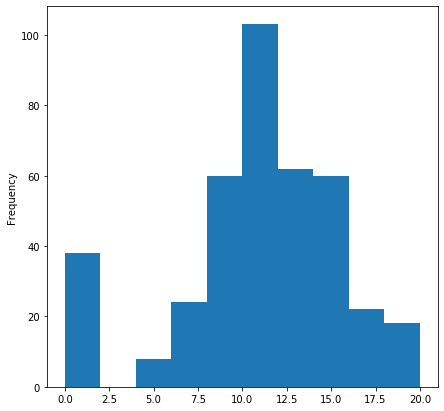

In [32]:
# гистограмма
data['G3'].plot(kind='hist', figsize=(7, 7))

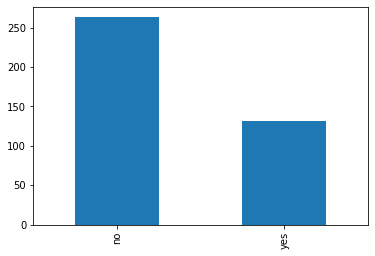

In [33]:
# для категориальных признаков
data['romantic'].value_counts().plot(kind='bar')

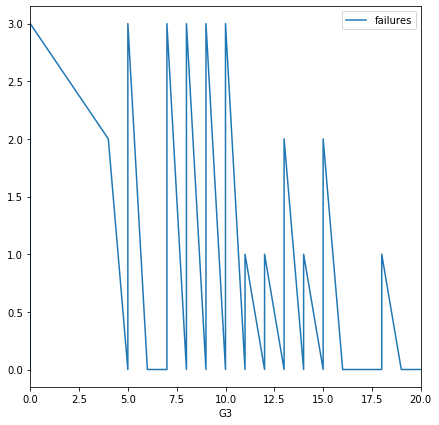

In [34]:
data.sort_values(['G3', 'failures']).plot(x='G3', y='failures', figsize=(7, 7), kind='line')

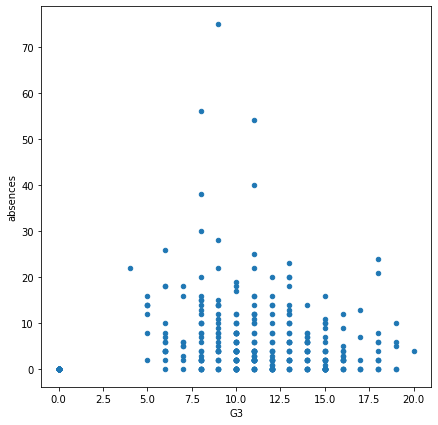

In [35]:
# scatter plot
data.plot(x='G3', y='absences', figsize=(7, 7), kind = 'scatter')

### Дополнительные материалы

+ [Первичный анализ данных с pandas от ODS](https://habr.com/ru/company/ods/blog/322626/) 
+ [Google facets tutorial](https://colab.research.google.com/github/PAIR-code/facets/blob/master/colab_facets.ipynb#scrollTo=b7zs2p2_goJa)